## Term Project - Biswajit Sharma

### Introduction

Obesity is a medical condition that is related to the excessive accumulation of body fat. It is not only a cosmetic concern but rather a medical problem that can increase the risk of other health problems and diseases like heart diseases, diabetes, high cholesterol, high blood pressure, liver disease, musculoskeletal disorders, and certain cancers. Since 1997, WHO has considered obesity a global epidemic and a significant health problem. To prevent obesity, various organizations, including government and non-government, are promoting campaigns regarding two main risk factors: eating habits and physical activity (Gozukara et al., 2023).

Although it is known that excessive intake of calories can cause obesity, nutritional factors like low-quality diet, unbalanced diet, processed foods, and alcohol consumption can also increase the risk of obesity. Physical activity has also been very influential in controlling or preventing obesity.  The frequency, duration, and intensity of physical activity and exercises play an essential role in the effective prevention and reduction of obesity (Gozukara et al., 2023). Eating healthy and nutrituous food helps in managing proper body weight and manage obesity. Therefore, it becomes important to invest resources to investigate the relationship of obesity with eating habits and physical activity. Healthcare plans can perform data mining and build model to predict the early detection of obesity risk for their memebers which can yeild huge benefits for both health plan and heathcare plan members. Early dtection of obesity risk helps induviduals to be aware of the risk and take preventive measures so that they do not develop obsity related health conditions and diseases in later stages of their life. It also helps health plans to intervene and incentivise members to motivate them in practising obesity management such as excercise, healthy eating habits, and reduction in acohol intake. This reduces the number of related health claims and essentially allow health plans to reduce the cost of care including lesser premium. As early detection of obesity risk and managing have immense benefits such as better health and well being of memebres, lower cost of care, improved health outcomes, higher memeber retention and competitive advantage, therefore, it is undoubtedly important to invest resources for the early detection of obesity risk and help induviduals to manage and prevent obesity.

 **This study will have two parst; firstly generate a model to estimate _obesity risk_ based on eating habits and physical activity and secondly suggest meal plans that matches particular calorific needs**

**UC Irvine Machine Learning Repository - Obesity levels, Eating Having and Physical activity dataset.**

This dataset include data about eating habits, physical activity, weight, height and obesity levels of individuals from the countries of mexico, Peru and Columbia. The data includes the eating habits and physical activity levels of 498 participants aged between 14 and 61 years ([UCI.2019][1]).

The originally collected data was preprocessed, such as the removal of missing values, and normalization was performed. It was also balanced to reduce the skewness of the obesity levels. 23% of the source data is actual responses collected over a 30-day survey, while the remaining 77% was synthetically generated using SMOTE (Palechor & de la Hoz Manotas, 2019).

There are 17 variables in the dataset.

 - Gender
 - Age
 - Height
 - Weight
 - Family History of overweight
 - Frequency of consumption of high caloric food (FAVC)
 - Frequency of consumption of vegetables (FCVC)
 - Number of main meals (NCP)
 - Consumption of food between meals (CAEC)
 - Daily consumption of water (CH20)
 - Consumption of alcohol (CALC)
 - Calorie consumption monitoring done (SCC)
 - Frequency of Physical activity (FAF)
 - Measuring Physical activity time using devices (TUE)
 - Mode of transportation used (MTRANS)
 - Obesity Level

**This dataset will be used for mining and modeling of prediction of obesity risk based on eating habits and physical activity**

**Diets, Recipes And Their Nutrients.**

This [dataset][2] consists of various recipes from different cusisine with amount of micronutrients (protein, carbs and fat) present in each recipe. Every person has different needs of calorific value and macronutrients absed on their weight and height. The calorie requirements for the males and females are different that are calculated using the Harries–Benedict equation as mentioned in below equations. Therefore the ideal calorific needs for induviduals with high risk of obesity can be identified as per below equations. Once the calorific needs are identified then few choice of appropriate meals can be suggested depending on individuals's cusisine choice. 

$Total Cal_{men} = 655 + 9.563*wt + 1.8496*ht - 4.6756*age$

$Total Cal_{women} = 66.47 + 9.13.75*wt + 5.003*ht - 6.7*age$

This dataset will be used to fit a model to suggest a recipe based on required total needed calories and cuisine type.

[1]: https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition
[2]: https://www.kaggle.com/datasets/thedevastator/healthy-diet-recipes-a-comprehensive-dataset

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

In [4]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
# read the recipe dataset
recipe_df = pd.read_csv("All_Diets.csv")

In [4]:
recipe_df.head()

,Diet_type,Recipe_name,Cuisine_type,Protein(g),Carbs(g),Fat(g),Extraction_day,Extraction_time
0,paleo,Bone Broth From 'Nom Nom Paleo',american,5.22,1.29,3.20,2022-10-16,17:20:09
1,paleo,"Paleo Effect Asian-Glazed Pork Sides, A Sweet ...",south east asian,181.55,28.62,146.14,2022-10-16,17:20:09
2,paleo,Paleo Pumpkin Pie,american,30.91,302.59,96.76,2022-10-16,17:20:09
3,paleo,Strawberry Guacamole recipes,mexican,9.62,75.78,59.89,2022-10-16,17:20:09
4,paleo,"Asian Cauliflower Fried ""Rice"" From 'Nom Nom P...",chinese,39.84,54.08,71.55,2022-10-16,17:20:09


We know that Weight and Height together is a deterministic measure of obesity. However, we want to predict the risk of obesity based on eating habits and physical adctivity variables, hence it is better to model based on only one of weight and height, so that model can account for the relationship  on eating habits and physical activity variables rather than weight and height.

In [5]:
#dropping weight from the datatframe
# df = df.drop(columns=["Weight", "Height"])

In [6]:
#convert all column names as lower case for consistent names
col_names = {cols: cols.lower()
 for cols in df.columns
}

df = df.rename(columns=col_names)

In [7]:
# view few rows
df.head()

,gender,age,height,weight,family_history_with_overweight,favc,fcvc,ncp,caec,smoke,ch2o,scc,faf,tue,calc,mtrans,nobeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [8]:
numerical_features = ["age", "fcvc", "ncp", "ch2o","faf", "tue","height","weight"]
# numerical_features = ["age", "height", "fcvc", "ncp", "ch2o","faf", "tue"]
categorical_features = ["gender", "family_history_with_overweight", "favc", "caec", "smoke", "scc", "calc", "mtrans"]
target = "nobeyesdad"

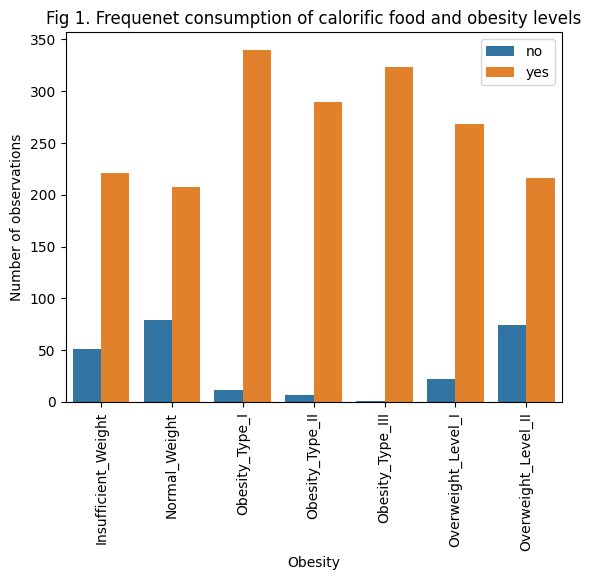

In [11]:
# create boxplot of high calorific food consumption for various obesity levels
# sns.boxplot(x=df["nobeyesdad"], y=df["fcvc"], hue=df["nobeyesdad"])
# plt.tick_params(labelright=True)
# plt.title("Fig 1. High calorific food consumption and obesity levels")
# plt.ylabel("Frequency of high calorific food consumption")
# plt.xlabel("Obesity Levels")
# plt.xticks(rotation=90)
# plt.show()
grouped = df.groupby(["nobeyesdad","favc"]).count()["age"].reset_index()
sns.barplot(data=grouped, x="nobeyesdad", y="age", hue="favc")
plt.title("Fig 1. Frequenet consumption of calorific food and obesity levels")
plt.ylabel("Number of observations")
plt.xlabel("Obesity")
plt.legend(loc="best")
plt.xticks(rotation=90)
plt.show()

Fig 1 shows that, the people with obesity levels tends to also have consume more high calorific foods than those who are normal weight or just overweight. This indicates the presence of a relationship between obesity and frequent consumption of high calorific foods.

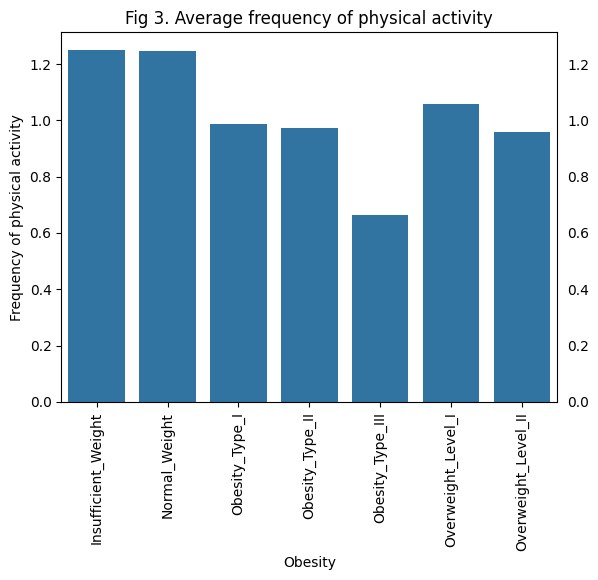

In [59]:
grouped = df[["nobeyesdad","faf"]].groupby("nobeyesdad").mean()
sns.barplot(data=grouped, x="nobeyesdad", y="faf")
# sns.boxplot(x=df["nobeyesdad"], y=df["ncp"], hue=df["nobeyesdad"])
plt.tick_params(labelright=True)
plt.title("Fig 2. Average frequency of physical activity")
plt.ylabel("Frequency of physical activity")
plt.xlabel("Obesity")
plt.xticks(rotation=90)
plt.show()

Fig 2 clearly shows that, the average frequency of physical activity among obese and overweight people if lower than those who are normal weight or underweight. This indicates the presence of a relationship between obesity and frequency of physical activity.

In [60]:
#Histogram of categorical features
# for cols in df[numerical_features]:
#     df[cols].hist(bins=40)
#     plt.title(f"Histogram of {cols}")
#     plt.show()

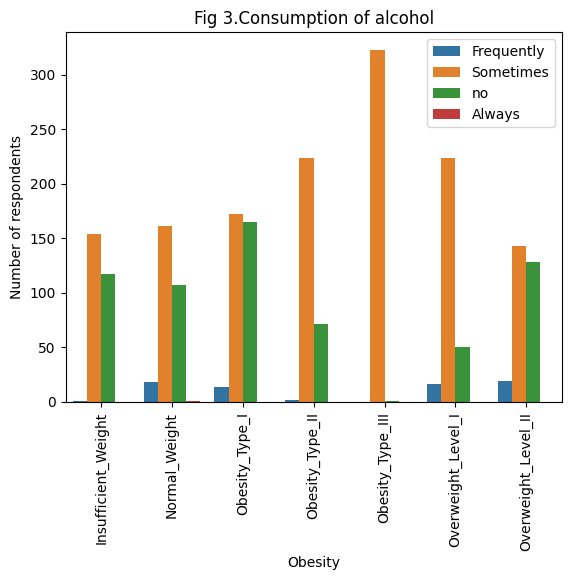

In [61]:
grouped = df.groupby(["nobeyesdad","calc"]).count()["age"].reset_index()
sns.barplot(data=grouped, x="nobeyesdad", y="age", hue="calc")
plt.title("Fig 3.Consumption of alcohol")
plt.ylabel("Number of respondents")
plt.xlabel("Obesity")
plt.legend(loc="best")
plt.xticks(rotation=90)
plt.show()

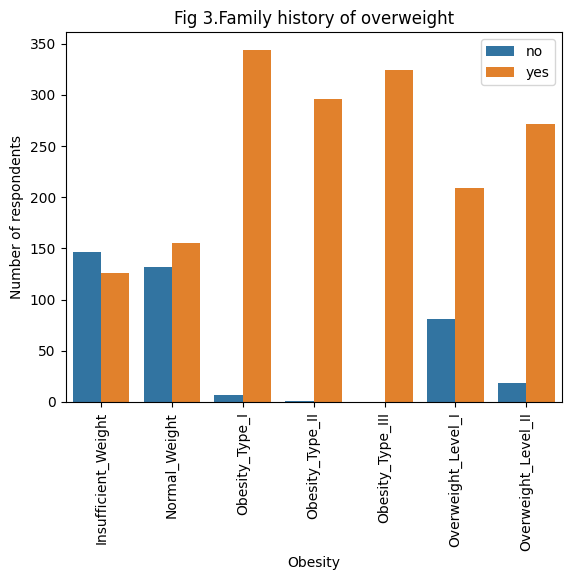

In [12]:
grouped = df.groupby(["nobeyesdad","family_history_with_overweight"]).count()["age"].reset_index()
sns.barplot(data=grouped, x="nobeyesdad", y="age", hue="family_history_with_overweight")
plt.title("Fig 3.Family history of overweight")
plt.ylabel("Number of respondents")
plt.xlabel("Obesity")
plt.legend(loc="best")
plt.xticks(rotation=90)
plt.show()

Fig 3 shows that, the obese and overweight people tends to generally have a family history of overweight. This indicates that family history plays a vital role in increasing the risk of besity which may be due to genetic factors.

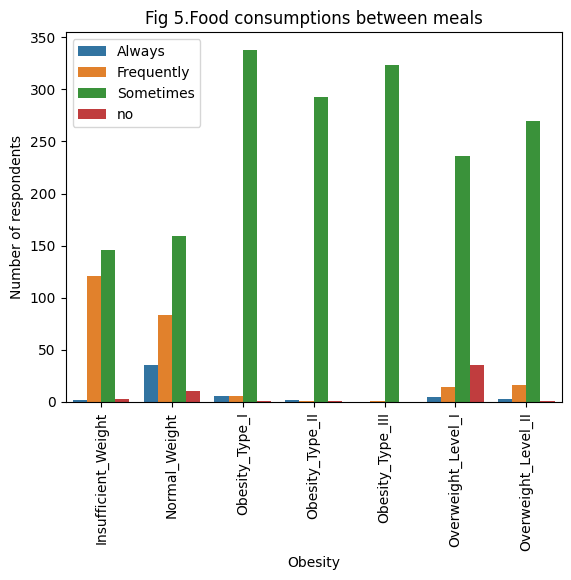

In [63]:
grouped = df.groupby(["nobeyesdad","caec"]).count()["age"].reset_index()
sns.barplot(data=grouped, x="nobeyesdad", y="age", hue="caec")
plt.title("Fig 5.Food consumptions between meals")
plt.ylabel("Number of respondents")
plt.xlabel("Obesity")
plt.legend(loc="best")
plt.xticks(rotation=90)
plt.show()

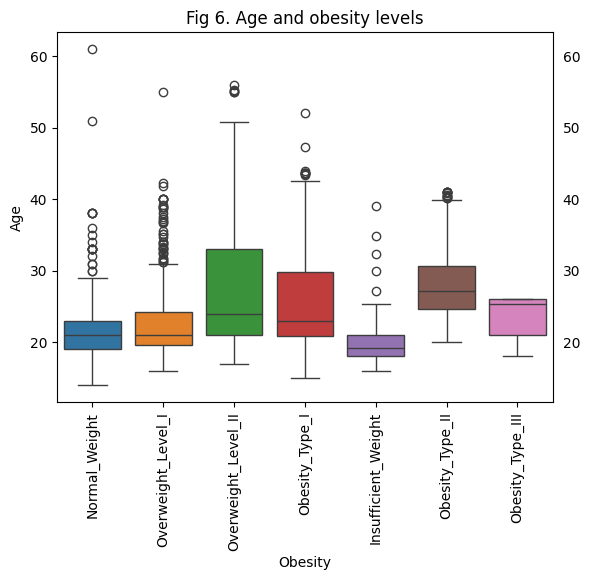

In [64]:
sns.boxplot(x=df["nobeyesdad"], y=df["age"], hue=df["nobeyesdad"])
plt.tick_params(labelright=True)
plt.title("Fig 6. Age and obesity levels")
plt.ylabel("Age")
plt.xlabel("Obesity")
plt.xticks(rotation=90)
plt.show()

Fig 1 shows that age may also play an important role in increasing the obesity risk. The boxplots shows that the median age of obese and overweight people are higher than that of those who are underweight or normal weight. It appers that people as people becomes older thare risk of obesity and overweight also increases.

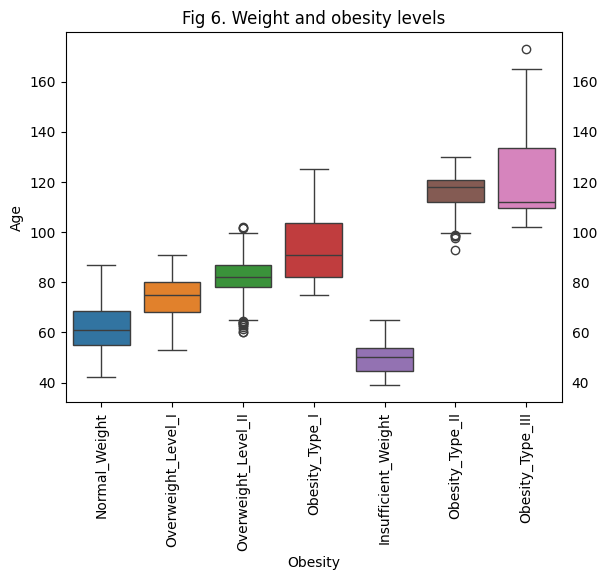

In [65]:
sns.boxplot(x=df["nobeyesdad"], y=df["weight"], hue=df["nobeyesdad"])
plt.tick_params(labelright=True)
plt.title("Fig 6. Weight and obesity levels")
plt.ylabel("Age")
plt.xlabel("Obesity")
plt.xticks(rotation=90)
plt.show()

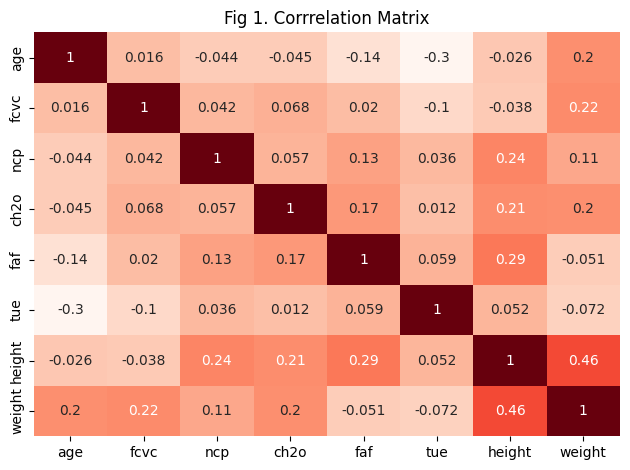

In [66]:
corr_df = df[numerical_features].corr()
# create correlation matrix heatmap visualization
sns.heatmap(corr_df, annot=True, cmap="Reds", cbar=False)
plt.title("Fig 1. Corrrelation Matrix")
plt.tight_layout()
plt.show()

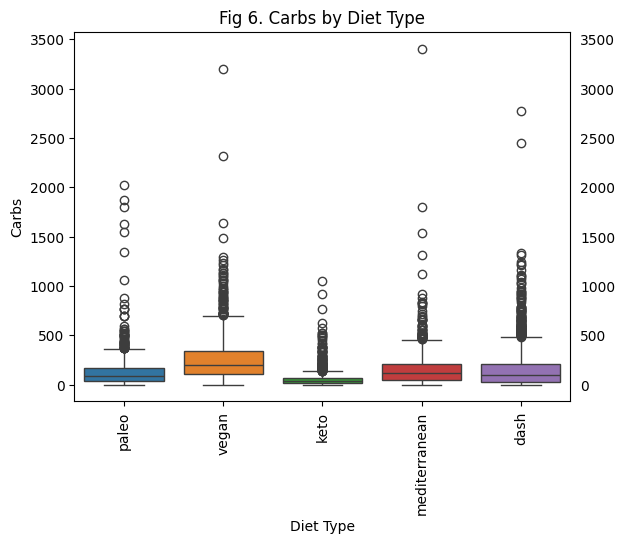

In [10]:
sns.boxplot(x=recipe_df["Diet_type"], y=recipe_df["Carbs(g)"], hue=recipe_df["Diet_type"])
plt.tick_params(labelright=True)
plt.title("Fig 6. Carbs by Diet Type")
plt.ylabel("Carbs")
plt.xlabel("Diet Type")
plt.xticks(rotation=90)
plt.show()

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import train_test_split, GridSearchCV

In [12]:
df_dummies = pd.get_dummies(df[categorical_features], dtype="int")

In [13]:
df_full_features = pd.concat([df[numerical_features],df_dummies], axis=1)

In [14]:
# using sklearn's train_test_split method to split the dataset
features_train, features_test, target_train, target_test = train_test_split(
    df_full_features, df[target], test_size=0.2, random_state=0
)

In [15]:
decision_tree = DecisionTreeClassifier(random_state=1)

In [16]:
hyperparameters = {
    "max_depth":[10, 20, 50]
}

In [17]:
gcv = GridSearchCV(
    decision_tree,
    hyperparameters,
    cv=5,
    verbose=1
)

In [18]:
target_train

1295         Obesity_Type_I
1627        Obesity_Type_II
1388         Obesity_Type_I
1318         Obesity_Type_I
648     Insufficient_Weight
               ...         
1033    Overweight_Level_II
1731        Obesity_Type_II
763      Overweight_Level_I
835      Overweight_Level_I
1653        Obesity_Type_II
Name: nobeyesdad, Length: 1688, dtype: object

In [19]:
best_model = gcv.fit(features_train, target_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


In [20]:
best_model.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 20,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 1,
 'splitter': 'best'}

In [21]:
predicted_test = best_model.predict(features_test)

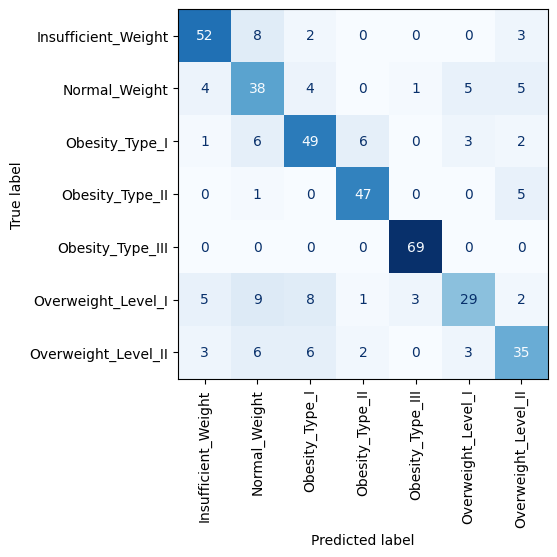

In [22]:
ConfusionMatrixDisplay.from_predictions(target_test, predicted_test, colorbar=False, cmap="Blues")
plt.xticks(rotation=90)
plt.show()

In [23]:
print(f"Accuracy: {accuracy_score(target_test, predicted_test)}")
print(f"Recall: {recall_score(target_test, predicted_test, average='macro')}")
print(f"Precision: {precision_score(target_test, predicted_test, average='macro')}")
print(f"F1-score: {f1_score(target_test, predicted_test,average='macro')}")
            

Accuracy: 0.7541371158392435
Recall: 0.7471339956095919
Precision: 0.750219510537527
F1-score: 0.7449926134452943


In [29]:
dummy_clf = DummyClassifier(strategy="uniform", random_state=1)

In [30]:
dummy_model = dummy_clf.fit(features_train, target_train)

In [31]:
dummy_predictions = dummy_model.predict(features_test)

In [32]:
print(f"Accuracy: {accuracy_score(target_test, dummy_predictions)}")
print(f"Recall: {recall_score(target_test, dummy_predictions, average='macro')}")
print(f"Precision: {precision_score(target_test, dummy_predictions, average='macro')}")
print(f"F1-score: {f1_score(target_test, dummy_predictions,average='macro')}")

Accuracy: 0.1276595744680851
Recall: 0.12669581200210725
Precision: 0.12867480519878444
F1-score: 0.1272973846711892


In [ ]:
features_train.info()

### References

http://helmut.knaust.info/BD/SixMajorReasons.pdf
https://blog.ed.gov/2022/08/the-importance-of-academic-advising-in-higher-education/#:~:text=Advisors%20assist%20in%20monitoring%20academic,major%20policies%20and%20procedures%20better.

Higher Education Students Performance Evaluation (Aug 14 2023)

Body Mass Index. (n.d.). Centers for Disease Control and Prevention.
https://www.cdc.gov/healthyweight/assessing/bmi/index.html#:~:text=Body%20Mass%20Index%20(BMI),
%20is,or%20health%20of%20an%20individual.

Defining Adult Overweight & Obesity. (n.d.). Centers for Disease Control and Prevention.
https://www.cdc.gov/obesity/basics/adult-defining.html

Estimation of obesity levels based on eating habits and physical condition. (2019). UCI Machine Learning Repository. https://doi.org/10.24432/C5H31Z.

Gozukara Bag, H.G., Yagin, F.H., Gormez, Y., González, P.P., Colak, C., Gülü, M., Badicu, G., Ardigò, L.P. 2023. Estimation of Obesity Levels through the Proposed Predictive Approach Based on Physical Activity and Nutritional Habits. Diagnostics. 13(18), 2949. https://doi.org/10.3390/diagnostics13182949

Nutrition, Physical Activity, and Obesity - Behavioral Risk Factor Surveillance System. (2023). Centers for Disease Control and Prevention.
https://data.cdc.gov/Nutrition-Physical-Activity-and-Obesity/ Nutrition-Physical-Activity-and-Obesity-Behavioral/hn4x-zwk7

Palechor, F.M., de la Hoz Manotas, A. (2019). Dataset for estimation of obesity levels based on eating habits and physical condition in individuals from Colombia, Peru and Mexico. Data Brief. 25, 104344. https://doi.org/10.1016/j.dib.2019.104344

In [ ]:
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9555702/

https://www.kaggle.com/datasets/thedevastator/healthy-diet-recipes-a-comprehensive-dataset

carbs to calorie - https://www.livestrong.com/article/81042-calculate-percentage-calories-fat-carbohydrate/

carbs to calorie - https://www.nal.usda.gov/programs/fnic#faq--how-many-calories-are-in-